# <Center> Bankruptcy Prediction</center>
#### <Center>Project By Kshitij Mayank and Kaushik Holla</Center>

In [81]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
%matplotlib inline
# For loading .arff files
import seaborn as sns
from scipy.io import arff
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute
from sklearn.impute import KNNImputer
# Library to perform Expectation-Maximization (EM) imputation
import impyute as impy
# To perform mean imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 



# Impoting classification models
# from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

Our dataset has 5 files for each year. Loading the files and collating every years data for later computation.

In [2]:
df = pd.read_csv("data/Cumulative_data.csv")
data= df.drop([df.columns[0], df.columns[1], df.columns[2], 'year'], axis=1)
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,bankruptcy_after_years
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0,0


In [3]:
dataframes = [data]

In [4]:
print(len(dataframes))
dataframes[0].head(5)

1


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,bankruptcy_after_years
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0,0


Now we make the attributes with the columnnames in the dataset description

In [5]:
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols
set_new_headers(dataframes)


In [6]:
# So now our columns are labelled
dataframes[0].head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,X65,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0,0


In [7]:
dataframes[0]['Y'] = dataframes[0]['X65']

In [8]:
dataframes[0].drop(['X65'],axis=1,inplace=True)

In [9]:
dataframes[0].dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [10]:
# Converting all columns to float now
def convert_columns_type_float(dfs):
    for i in range(len(dataframes)):
        index = 1
        while(index<=63):
            colname = dfs[i].columns[index]
            col = getattr(dfs[i], colname)
            dfs[i][colname] = col.astype(float)
            index+=1
            
convert_columns_type_float(dataframes)

In [11]:
# We now convert our 'Y' Target Variable to either 0 or 1.
# 0-Not Bankrupt (False)
# 1- Bankrupt (True)

dataframes[0]['Y'][0:5]

0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64

In [12]:
def convert_class_label_type_int(dfs):
    for i in range(len(dfs)):
        col = getattr(dfs[i], 'Y')
        dfs[i]['Y'] = col.astype(int)
        
convert_class_label_type_int(dataframes)

In [13]:
dataframes[0]['Y'][0:5]

0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64

In [14]:
dataframes[0]['Y'].unique()

array([0, 1])

### Data Analysis

Checking for missing data.

In [15]:
def drop_nan_rows(dataframes, verbose=False):
    clean_dataframes = [df.dropna(axis=0, how='any') for df in dataframes]
    if verbose:
        for i in range(len(dataframes)):
            print(str(i+1)+'DATA:','Original Length=', len(dataframes[i]), '\tCleaned Length=', len(clean_dataframes[i]), '\tMissing Data=', len(dataframes[i])-len(clean_dataframes[i]))
    return clean_dataframes
nan_dropped_dataframes = drop_nan_rows(dataframes, verbose=True)

1DATA: Original Length= 43405 	Cleaned Length= 19967 	Missing Data= 23438


We see that a lot of values are missing from our dataframes. Hence we would have to go for any suitable imputation techniques as we see that it is as high as 50% for some of the dataframes.

**Let's analyse more for our missing data**

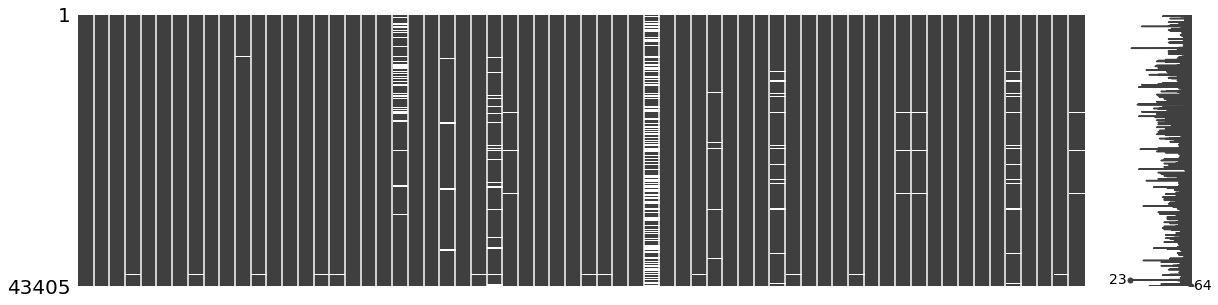

In [16]:
# generate the sparsity matrix (figure) for all the dataframes
def generate_sparsity_matrix(dfs):
    for i in range(len(dataframes)):
        missing_df_i = dfs[i].columns[dfs[i].isnull().any()].tolist()
        msno.matrix(dfs[i][missing_df_i], figsize=(20,5))

generate_sparsity_matrix(dataframes)

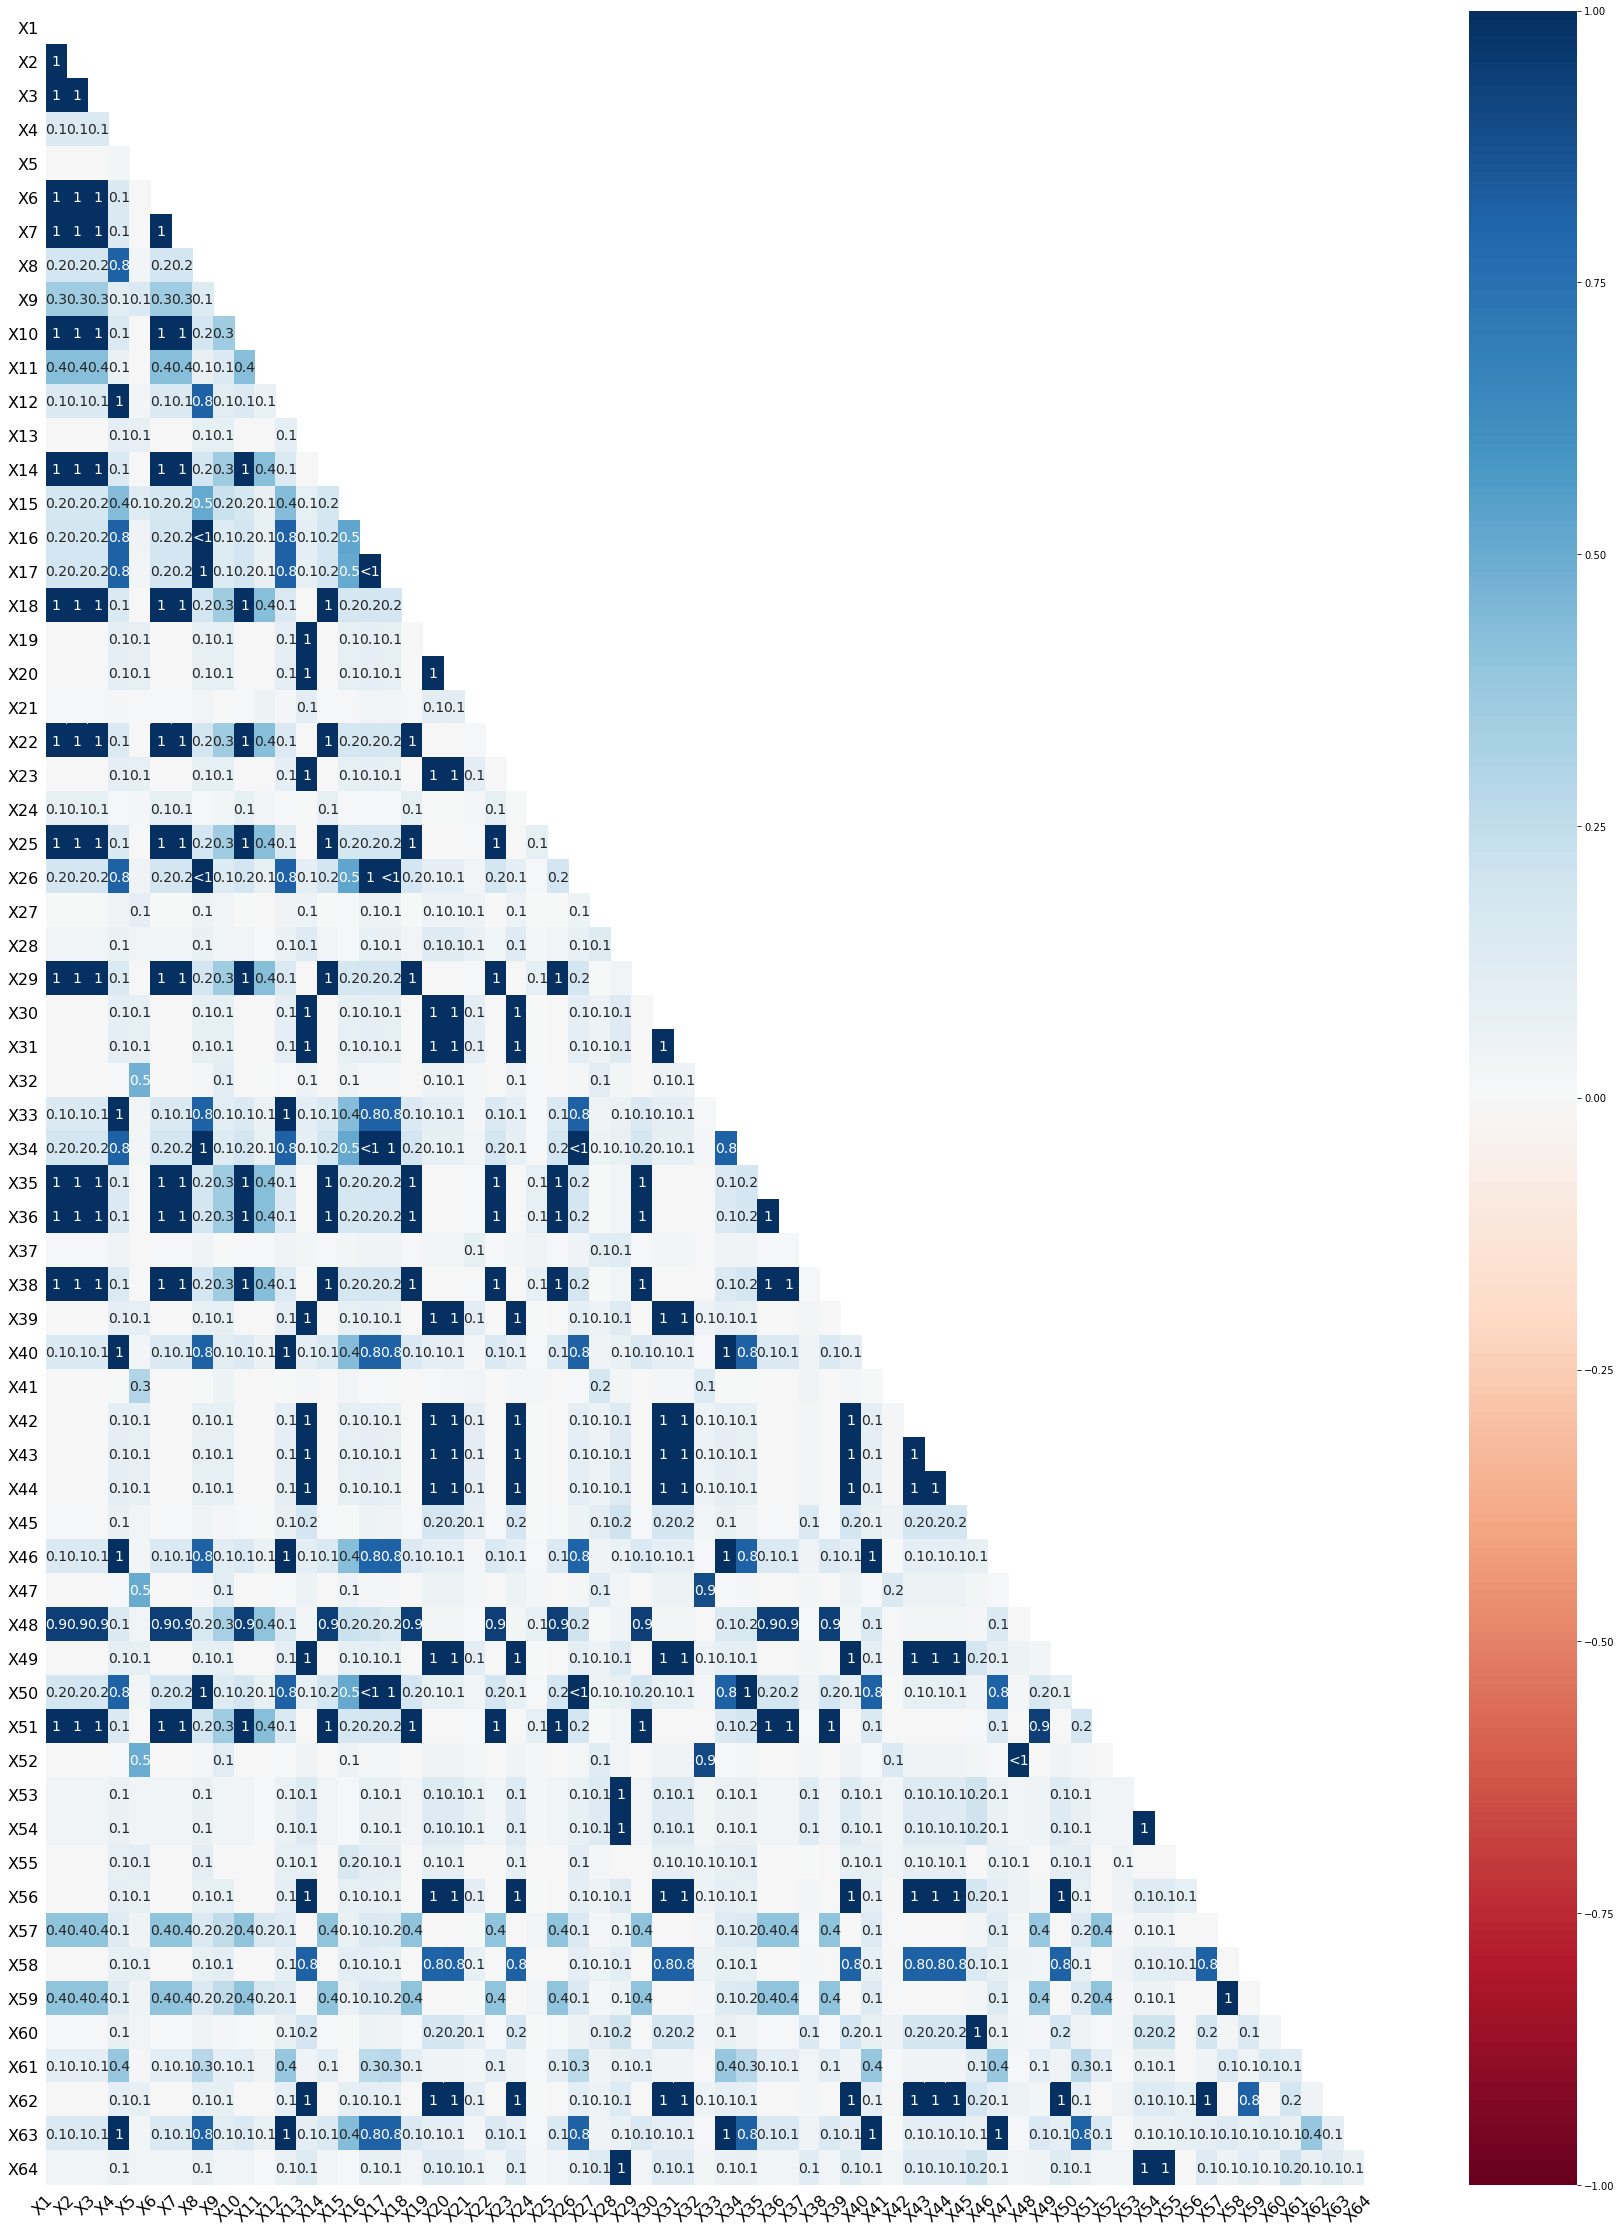

In [17]:
# GETTING CO-RELATION NOW
# import matplotlib.pyplot as plt
# fig,ax = plt.subplots(figsize=(50,50))
def generate_heatmap(dfs):
    for i in range(1):
        missing_df_i = dfs[i].columns[dfs[i].isnull().any()].tolist()
        msno.heatmap(dfs[i][missing_df_i], figsize=(30,40))
#         sns.heatmap(dfs[i][missing_df_i], annot=True)
generate_heatmap(dataframes)

The heat maps above, for all the 5 dataframes, describe the degree of nullity relationship between different features. The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1).
Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed.

A perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values.

A perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.

The takeaway is that, in each dataframe, there are some features that are heavily correlated (R = 1 or -1) and also there are features that are not essentially correlated (R values close to 0)

### Imputation 
- Mean Imputation
- k-NN Imputation
- EM Imputation

In [18]:
def perform_mean_imputation(dfs):
    # Construct an imputer with strategy as 'mean', to mean-impute along the columns
#     imputer = imputer(missing_values=np.nan, strategy='mean', axis=0)
    mean_imputed_dfs = [pd.DataFrame(imputer.fit_transform(df)) for df in dfs]
    for i in range(len(dfs)):
        mean_imputed_dfs[i].columns = dfs[i].columns   
    return mean_imputed_dfs

mean_imputed_dataframes = perform_mean_imputation(dataframes)

In [19]:
mean_imputed_dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [20]:
knn_imputer = KNNImputer(n_neighbors=100)
def perform_knn_imputation(dfs):
    knn_imputed_datasets = [knn_imputer.fit_transform(dfs[i]) for i in range(len(dfs))]
    return [pd.DataFrame(data=knn_imputed_datasets[i]) for i in range(len(dfs))]
    
knn_imputed_dataframes = perform_knn_imputation(dataframes)
set_new_headers(knn_imputed_dataframes)

In [21]:
knn_imputed_dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [22]:
dataframes[0].Y.unique()

array([0, 1])

In [23]:
def perform_EM_imputation(dfs):
    em_imputed_datasets = [impy.imputation.cs.em(dfs[i].values, loops=50, dtype='cont') for i in range(len(dfs))]
    return [pd.DataFrame(data=em_imputed_datasets[i]) for i in range(len(dfs))]

em_imputed_dataframes = perform_EM_imputation(dataframes)
set_new_headers(em_imputed_dataframes)

In [24]:
em_imputed_dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [26]:
imputed_dataframes_dictionary = OrderedDict()
imputed_dataframes_dictionary['Mean'] = mean_imputed_dataframes
imputed_dataframes_dictionary['k-NN'] = knn_imputed_dataframes
imputed_dataframes_dictionary['EM'] = em_imputed_dataframes

## Dealing with data imbalance
- Data imbalance critically affects the modeling as the models won't have sufficient data belonging to minority classes to train on and this leads to biased models, ultimately leading to poor performance on test data.

In [27]:
def check_data_imbalance(dfs):
    for i in range(len(dfs)):
        print('Cumulative Dataset:')
        print(dfs[i].groupby('Y').size())
        minority_percent = (dfs[i]['Y'].tolist().count(1) / len(dfs[i]['Y'].tolist()))*100
        print('Minority (label 1) percentage: '+  str(minority_percent) + '%')
        print('-'*64)
        
check_data_imbalance(dataframes)

Cumulative Dataset:
Y
0    41314
1     2091
dtype: int64
Minority (label 1) percentage: 4.81741734823177%
----------------------------------------------------------------


We have seen in the step above that there is a lot of data imbalance for our datasets, as indicated by the percentage of minority class (label 1) samples among their datasets. With this huge magnitude of data imbalance, the models will not train wel if we leave them as is.

### Oversampling using SMOTE
- SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
- It aims to balance class distribution by randomly increasing minority class examples by replicating them.SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [29]:
# Split the features and labels into separate dataframes for all the original dataframes
def split_dataframes_features_labels(dfs):
#     getting features
    feature_dfs = [dfs[i].iloc[:,0:64] for i in range(len(dfs))]
#     getting labels
    label_dfs = [dfs[i].iloc[:,64] for i in range(len(dfs))]
    return feature_dfs, label_dfs

# Performs the SMOTE oversampling fro given dataframes.
def oversample_data_SMOTE(dfs, verbose=False):
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=10)
    #Split the features and labels for each dataframe
    feature_dfs, label_dfs = split_dataframes_features_labels(dfs)
    resampled_feature_arrays = []
    resampled_label_arrays = []
    for i in range(len(dfs)):
        if verbose: print('Cumulative Dataset: ')
        if verbose: print('Original dataset shape {}'.format(Counter(label_dfs[i])))
        dfi_features_res, dfi_label_res = smote.fit_sample(feature_dfs[i], label_dfs[i])
        if verbose: print('Resampled dataset shape {}\n'.format(Counter(dfi_label_res)))
        # Append the resampled feature and label arrays of ith dataframe to their respective list of arrays    
        resampled_feature_arrays.append(dfi_features_res)
        resampled_label_arrays.append(dfi_label_res)        
    return resampled_feature_arrays, resampled_label_arrays

# Utility Function to convert the arrays of features and labels to pandas dataframes, and then join them.
# Also re-assign the columns headers.
def restructure_arrays_to_dataframes(feature_arrays, label_arrays):
    resampled_dfs = []
    for i in range(len(feature_arrays)):
        feature_df = pd.DataFrame(data=feature_arrays[i])
        label_df = pd.DataFrame(data=label_arrays[i])
        # Must set the column header for label_df, otherwise it wont join with feature_df, as columns overlap (with col names '0')
        label_df.columns=['Y'] 
        resampled_dfs.append(feature_df.join(label_df))
    # re-assign the column headers for features and labels    
    set_new_headers(resampled_dfs)    
    return resampled_dfs

# Perform SMOTE oversampling on all the imputed dataframes, and return them in a dictionary.
def perform_oversampling_on_imputed_dataframes(df_dict):
    imputed_oversampled_dataframes_dictionary = OrderedDict()
    for key,dfs in df_dict.items():
        print('SMOTE Oversampling for ' + key + ' imputed dataframes\n')
        smote_feature_arrays, smote_label_arrays = oversample_data_SMOTE(dfs, verbose=True)
        oversampled_dataframes = restructure_arrays_to_dataframes(smote_feature_arrays, smote_label_arrays)
        imputed_oversampled_dataframes_dictionary[key] = oversampled_dataframes
        print('-'*100)
    return imputed_oversampled_dataframes_dictionary

imputed_oversampled_dataframes_dictionary = perform_oversampling_on_imputed_dataframes(imputed_dataframes_dictionary)

SMOTE Oversampling for Mean imputed dataframes

Cumulative Dataset: 
Original dataset shape Counter({0.0: 41314, 1.0: 2091})
Resampled dataset shape Counter({0.0: 41314, 1.0: 41314})

----------------------------------------------------------------------------------------------------
SMOTE Oversampling for k-NN imputed dataframes

Cumulative Dataset: 
Original dataset shape Counter({0.0: 41314, 1.0: 2091})
Resampled dataset shape Counter({0.0: 41314, 1.0: 41314})

----------------------------------------------------------------------------------------------------
SMOTE Oversampling for EM imputed dataframes

Cumulative Dataset: 
Original dataset shape Counter({0.0: 41314, 1.0: 2091})
Resampled dataset shape Counter({0.0: 41314, 1.0: 41314})

----------------------------------------------------------------------------------------------------


In [30]:
len(imputed_oversampled_dataframes_dictionary['Mean'][0])

82628

## ML-Classification Models

In [36]:
def prepare_kfold_cv_data(k, X, y, verbose=False):
    X = X.values
    y = y.values
    kf = KFold(n_splits=k, shuffle=False, random_state=42)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    for train_index, test_index in kf.split(X):
        X_train.append(X[train_index])
        y_train.append(y[train_index])
        X_test.append(X[test_index])
        y_test.append(y[test_index])
    return X_train, y_train, X_test, y_test

In [43]:
# Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()
# Logistic Regression classifier
lr_classifier = LogisticRegression(penalty = 'l2', random_state = 0)
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')


In [44]:
# creating a dictionary of models
models_dictionary = OrderedDict()

models_dictionary['Gaussian Naive Bayes'] = gnb_classifier
models_dictionary['Logistic Regression'] = lr_classifier
models_dictionary['Decision Tree'] = dt_classifier
models_dictionary['Random Forest'] = rf_classifier


In [45]:
# perform data modeling
def perform_data_modeling(_models_, _imputers_, verbose=False, k_folds=5):
    
    # 4 Models 
    # 3 Imputers
    model_results = OrderedDict()
    
    # Iterate over the models
    for model_name, clf in _models_.items():
        if verbose: print("-"*120, "\n", "Model: " + '\033[1m' + model_name + '\033[0m' + " Classifier")
        imputer_results = OrderedDict()
        
        # Iterate over the different imputed_data mechanisms (Mean, k-NN, EM)
        for imputer_name, dataframes_list in _imputers_.items():
            if verbose: print('\tImputer Technique: ' + '\033[1m' + imputer_name + '\033[0m')
            
            # call the split_dataframes_features_labels function to get a list of features and labels for all the dataframes
            feature_dfs, label_dfs = split_dataframes_features_labels(dataframes_list)            
            
            year_results = OrderedDict()
            
            # Iterate over dataframe_list individually
            for df_index in range(len(dataframes_list)):
                if verbose: print('\t\tCumulative Dataset: ')
                
                # Calling the 'prepare_kfold_cv_data' returns lists of features and labels 
                # for train and test sets respectively.
                # The number of items in the list is equal to k_folds
                X_train_list, y_train_list, X_test_list, y_test_list = prepare_kfold_cv_data(k_folds, feature_dfs[df_index], label_dfs[df_index], verbose)
                
                metrics_results = OrderedDict()
                accuracy_list = np.zeros([k_folds])
                precision_list = np.zeros([k_folds,2])
                recall_list = np.zeros([k_folds,2])
                TN_list = np.zeros([k_folds])
                FP_list = np.zeros([k_folds])
                FN_list = np.zeros([k_folds])
                TP_list = np.zeros([k_folds])                
                
                # Iterate over all the k-folds
                for k_index in range(k_folds):
                    X_train = X_train_list[k_index]
                    y_train = y_train_list[k_index]
                    X_test = X_test_list[k_index]
                    y_test = y_test_list[k_index]
                    
                    # Fit the model and 
                    clf = clf.fit(X_train, y_train)
                    y_test_predicted = clf.predict(X_test)
                    
                    #code for calculating accuracy 
                    _accuracy_ = accuracy_score(y_test, y_test_predicted, normalize=True)
                    accuracy_list[k_index] = _accuracy_
                    
                    #code for calculating recall 
                    _recalls_ = recall_score(y_test, y_test_predicted, average=None)
                    recall_list[k_index] = _recalls_
                    
                    #code for calculating precision 
                    _precisions_ = precision_score(y_test, y_test_predicted, average=None)
                    precision_list[k_index] = _precisions_
                    
                    #code for calculating confusion matrix 
                    _confusion_matrix_ = confusion_matrix(y_test, y_test_predicted)
                    TN_list[k_index] = _confusion_matrix_[0][0]
                    FP_list[k_index] = _confusion_matrix_[0][1]
                    FN_list[k_index] = _confusion_matrix_[1][0]
                    TP_list[k_index] = _confusion_matrix_[1][1]
                
                # creating a metrics dictionary
                metrics_results['Accuracy'] = np.mean(accuracy_list)
                metrics_results['Precisions'] = np.mean(precision_list, axis=0)
                metrics_results['Recalls'] = np.mean(recall_list, axis=0)
                metrics_results['TN'] = np.mean(TN_list)
                metrics_results['FP'] = np.mean(FP_list)
                metrics_results['FN'] = np.mean(FN_list)
                metrics_results['TP'] = np.mean(TP_list)
                
                if verbose:
                    print('\t\t\tAccuracy:', metrics_results['Accuracy'])
                    print('\t\t\tPrecision:', metrics_results['Precisions'])
                    print('\t\t\tRecall:', metrics_results['Recalls'])
                
                year_results[str(df_index+1)+'year'] = metrics_results   
                
            imputer_results[imputer_name] = year_results
            
        model_results[model_name] = imputer_results  
        
    return model_results

In [46]:
results = perform_data_modeling(models_dictionary, imputed_oversampled_dataframes_dictionary, verbose=True, k_folds=5)

------------------------------------------------------------------------------------------------------------------------ 
 Model: Gaussian Naive Bayes Classifier
	Imputer Technique: Mean
		Cumulative Dataset: 
			Accuracy: 0.5052881834941063
			Precision: [0.51437134 0.50035988]
			Recall: [0.01735116 0.97835446]
	Imputer Technique: k-NN
		Cumulative Dataset: 
			Accuracy: 0.5070429530837851
			Precision: [0.51619546 0.50044972]
			Recall: [0.02018065 0.97729544]
	Imputer Technique: EM
		Cumulative Dataset: 
			Accuracy: 0.5143041980518298
			Precision: [0.53042396 0.50121528]
			Recall: [0.02997225 0.97504647]
------------------------------------------------------------------------------------------------------------------------ 
 Model: Logistic Regression Classifier
	Imputer Technique: Mean
		Cumulative Dataset: 
			Accuracy: 0.28851771828666617
			Precision: [0.52000468 0.53603175]
			Recall: [0.27003124 0.4618013 ]
	Imputer Technique: k-NN
		Cumulative Dataset: 
			Accuracy: 0.357

## Model Analysis

In [47]:
# models ranked by performance
def perform_model_ranking(models, imputers, results):
    column_headers = ['-'] + list(imputers.keys())
    rows = []
    for model_name, model_details in results.items():
        row = [model_name]
        for imputer_name, imputer_details in model_details.items():
            mean_accuracy = 0
            for year, metrics in imputer_details.items():
                mean_accuracy += metrics['Accuracy']
            mean_accuracy = mean_accuracy/len(imputer_details)
            row.append(mean_accuracy)
        rows.append(row)
    results_df = pd.DataFrame(data=rows, columns = column_headers)
    return results_df

In [48]:
perform_model_ranking(models_dictionary, imputed_oversampled_dataframes_dictionary, results)

,-,Mean,k-NN,EM
0,Gaussian Naive Bayes,0.505288,0.507043,0.514304
1,Logistic Regression,0.288518,0.357211,0.502031
2,Decision Tree,0.898473,0.890849,0.887133
3,Random Forest,0.920766,0.913359,0.902286


### Results and Comparision

We use or results list to make data frames for each imputation technique below. To see the entire list check the result array.

In [52]:
# MEAN_IMPUTATION
mean_model_val = pd.DataFrame(
data=[['Gaussian Naive Bayes',244.2,8018.6,157.0,8105.8],
      ['Logistic_Regression',3265.8,4997,6760.6,1502.2],
      ['Decision_Tree',7201.0,1061.8,616.0,7646.8],
      ['Random_Forest',7372.0,890.8,418.6,7844.2]],
columns=['Models','TN','FP','FN','TP']
)

In [53]:
mean_model_val

,Models,TN,FP,FN,TP
0,Gaussian Naive Bayes,244.2,8018.6,157.0,8105.8
1,Logistic_Regression,3265.8,4997.0,6760.6,1502.2
2,Decision_Tree,7201.0,1061.8,616.0,7646.8
3,Random_Forest,7372.0,890.8,418.6,7844.2


In [54]:
# KNN_IMPUTATION
knn_model_val = pd.DataFrame(
data=[['Gaussian Naive Bayes',286.6,7976.2,170.4,8092.4],
      ['Logistic_Regression',3949.6,4313.2,6309.2,1953.6],
      ['Decision_Tree',7205.8,1057.0,746.8,7516.0],
     ['Random_Forest',7129.4,901.2,530.6,7732.2]],
columns=['Models','TN','FP','FN','TP']
)

In [55]:
knn_model_val

,Models,TN,FP,FN,TP
0,Gaussian Naive Bayes,286.6,7976.2,170.4,8092.4
1,Logistic_Regression,3949.6,4313.2,6309.2,1953.6
2,Decision_Tree,7205.8,1057.0,746.8,7516.0
3,Random_Forest,7361.6,901.2,530.6,7732.2


In [56]:
# EM_IMPUTATION
em_model_val = pd.DataFrame(
data=[['Gaussian Naive Bayes',286.6,7976.2,170.4,8092.4],
      ['Logistic_Regression',3949.6,4313.2,6309.2,1953.6],
      ['Decision_Tree',7205.8,1057.0,746.8,7516.0],
     ['Random_Forest',7129.4,1133.4,481.4,7781.4]],
columns=['Models','TN','FP','FN','TP']
)
em_model_val

,Models,TN,FP,FN,TP
0,Gaussian Naive Bayes,286.6,7976.2,170.4,8092.4
1,Logistic_Regression,3949.6,4313.2,6309.2,1953.6
2,Decision_Tree,7205.8,1057.0,746.8,7516.0
3,Random_Forest,7129.4,1133.4,481.4,7781.4


### Evaluation Metrics

#### KNN Imputation

In [92]:
knn_model_val['Precision'] =  knn_model_val['TP']/(knn_model_val['TP'] + knn_model_val['FP'])
knn_model_val['Recall'] =  knn_model_val['TP']/(knn_model_val['TP'] + knn_model_val['FN'])
knn_model_val['F1_Score'] =  knn_model_val['TP']/(knn_model_val['TP'] + 0.5*(knn_model_val['FP']+knn_model_val['FN']))
knn_model_val['Accuracy_Percentage'] =  (knn_model_val['TP']+ knn_model_val['TN'])*100/(knn_model_val['TP']+ knn_model_val['TN']+knn_model_val['FP']+ knn_model_val['FN'])
knn_model_val['Accuracy'] =  (knn_model_val['TP']+ knn_model_val['TN'])/(knn_model_val['TP']+ knn_model_val['TN']+knn_model_val['FP']+ knn_model_val['FN'])

In [93]:
knn_model_val

,Models,TN,FP,FN,TP,F1_Score,Accuracy,Accuracy_Percentage,Precision,Recall
0,Gaussian Naive Bayes,286.6,7976.2,170.4,8092.4,0.665182,0.507032,50.703151,0.503616,0.979377
1,Logistic_Regression,3949.6,4313.2,6309.2,1953.6,0.268913,0.357215,35.721547,0.311738,0.236433
2,Decision_Tree,7205.8,1057.0,746.8,7516.0,0.892859,0.890848,89.084814,0.876706,0.909619
3,Random_Forest,7361.6,901.2,530.6,7732.2,0.915259,0.913359,91.335867,0.895615,0.935784


Text(0, 0.5, 'Metrics')

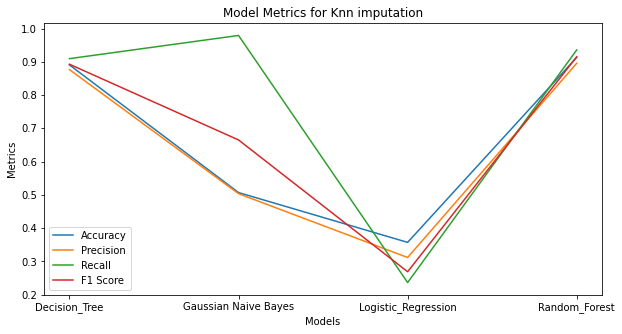

In [94]:
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.lineplot(data=knn_model_val,x='Models',y='Accuracy', label = "Accuracy")
sns.lineplot(data=knn_model_val,x='Models',y='Precision', label = "Precision")
sns.lineplot(data=knn_model_val,x='Models',y='Recall', label = "Recall")
sns.lineplot(data=knn_model_val,x='Models',y='F1_Score', label = "F1 Score")
ax1.set_title("Model Metrics for Knn imputation")
ax1.set_xlabel("Models")
ax1.set_ylabel("Metrics")

#### MEAN IMPUTATION

In [95]:
mean_model_val['F1_Score'] =  mean_model_val['TP']/(mean_model_val['TP'] + 0.5*(mean_model_val['FP']+mean_model_val['FN']))
mean_model_val['Accuracy_Percentage'] =  (mean_model_val['TP']+ mean_model_val['TN'])*100/(mean_model_val['TP']+ mean_model_val['TN']+mean_model_val['FP']+ mean_model_val['FN'])
mean_model_val['Precision'] =  mean_model_val['TP']/(mean_model_val['TP'] + mean_model_val['FP'])
mean_model_val['Recall'] =  mean_model_val['TP']/(mean_model_val['TP'] + mean_model_val['FN'])
mean_model_val['Accuracy'] =  (mean_model_val['TP']+ mean_model_val['TN'])/(mean_model_val['TP']+ mean_model_val['TN']+mean_model_val['FP']+ mean_model_val['FN'])

In [96]:
mean_model_val

,Models,TN,FP,FN,TP,F1_Score,Accuracy_Percentage,Precision,Recall,Accuracy
0,Gaussian Naive Bayes,244.2,8018.6,157.0,8105.8,0.664759,50.527666,0.502704,0.980999,0.505277
1,Logistic_Regression,3265.8,4997.0,6760.6,1502.2,0.203523,28.852205,0.231136,0.181803,0.288522
2,Decision_Tree,7201.0,1061.8,616.0,7646.8,0.901140,89.847267,0.878075,0.925449,0.898473
3,Random_Forest,7372.0,890.8,418.6,7844.2,0.922967,92.076536,0.898019,0.949339,0.920765


Text(0, 0.5, 'Metrics')

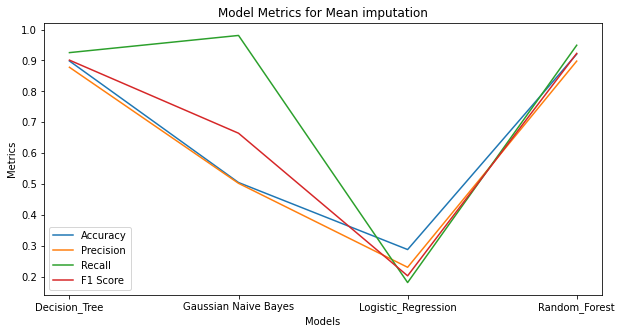

In [97]:
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.lineplot(data=mean_model_val,x='Models',y='Accuracy', label = "Accuracy")
sns.lineplot(data=mean_model_val,x='Models',y='Precision', label = "Precision")
sns.lineplot(data=mean_model_val,x='Models',y='Recall', label = "Recall")
sns.lineplot(data=mean_model_val,x='Models',y='F1_Score', label = "F1 Score")
ax1.set_title("Model Metrics for Mean imputation")
ax1.set_xlabel("Models")
ax1.set_ylabel("Metrics")

#### EM Imputation

In [98]:
em_model_val['F1_Score'] =  em_model_val['TP']/(em_model_val['TP'] + 0.5*(em_model_val['FP']+em_model_val['FN']))
em_model_val['Accuracy_Percentage'] =  (em_model_val['TP']+ em_model_val['TN'])*100/(em_model_val['TP']+ em_model_val['TN']+em_model_val['FP']+ em_model_val['FN'])
em_model_val['Precision'] =  em_model_val['TP']/(em_model_val['TP'] + em_model_val['FP'])
em_model_val['Recall'] =  em_model_val['TP']/(em_model_val['TP'] + em_model_val['FN'])
em_model_val['Accuracy'] =  (em_model_val['TP']+ em_model_val['TN'])/(em_model_val['TP']+ em_model_val['TN']+em_model_val['FP']+ em_model_val['FN'])
em_model_val

,Models,TN,FP,FN,TP,F1_Score,Accuracy_Percentage,Precision,Recall,Accuracy
0,Gaussian Naive Bayes,286.6,7976.2,170.4,8092.4,0.665182,50.703151,0.503616,0.979377,0.507032
1,Logistic_Regression,3949.6,4313.2,6309.2,1953.6,0.268913,35.721547,0.311738,0.236433,0.357215
2,Decision_Tree,7205.8,1057.0,746.8,7516.0,0.892859,89.084814,0.876706,0.909619,0.890848
3,Random_Forest,7129.4,1133.4,481.4,7781.4,0.905994,90.228494,0.872863,0.941739,0.902285


Text(0, 0.5, 'Metrics')

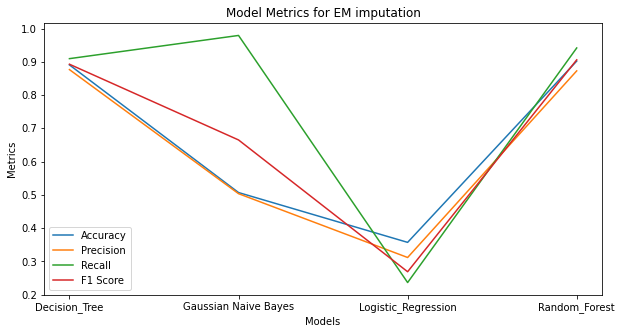

In [99]:
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.lineplot(data=em_model_val,x='Models',y='Accuracy', label = "Accuracy")
sns.lineplot(data=em_model_val,x='Models',y='Precision', label = "Precision")
sns.lineplot(data=em_model_val,x='Models',y='Recall', label = "Recall")
sns.lineplot(data=em_model_val,x='Models',y='F1_Score', label = "F1 Score")
ax1.set_title("Model Metrics for EM imputation")
ax1.set_xlabel("Models")
ax1.set_ylabel("Metrics")